The complete explanation for this notebook is available at https://youranalystbuddy.com/polynomial-regression/

<h2> Polynomial Regression </h2>

<h3>Loading data</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('auto-mpg.csv')

train, test = train_test_split(data, test_size=0.2)
train.head(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname
284,20.6,6,225.0,110.0,3360,16.6,79,1,dodge aspen 6
18,27.0,4,97.0,88.0,2130,14.5,70,3,datsun pl510
88,14.0,8,302.0,137.0,4042,14.5,73,1,ford gran torino


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 284 to 100
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           318 non-null    float64
 1   cylinders     318 non-null    int64  
 2   displacement  318 non-null    float64
 3   horsepower    314 non-null    float64
 4   weight        318 non-null    int64  
 5   acceleration  318 non-null    float64
 6   year          318 non-null    int64  
 7   origin        318 non-null    int64  
 8   carname       318 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 24.8+ KB


### Linear model

#### Processing pipeline

In [3]:
num_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
cat_cols = ['origin']
target = 'mpg'

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

#pipeline for numeric features

num_pipeline = Pipeline([
    ('standardize', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

#pipeline for class features
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

#full pipeline - combine numeric and class pipelines
data_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

linear_reg_pipeline = Pipeline([
    ('processing', data_pipeline),
    ('modeling', LinearRegression())
])

#### Model testing

In [4]:
from sklearn.model_selection import cross_val_score

r2_10cv = cross_val_score(linear_reg_pipeline, train, train[[target]], cv=10, scoring='r2')
np.mean(r2_10cv)

0.8202131342038648

### Investigating scatter plots

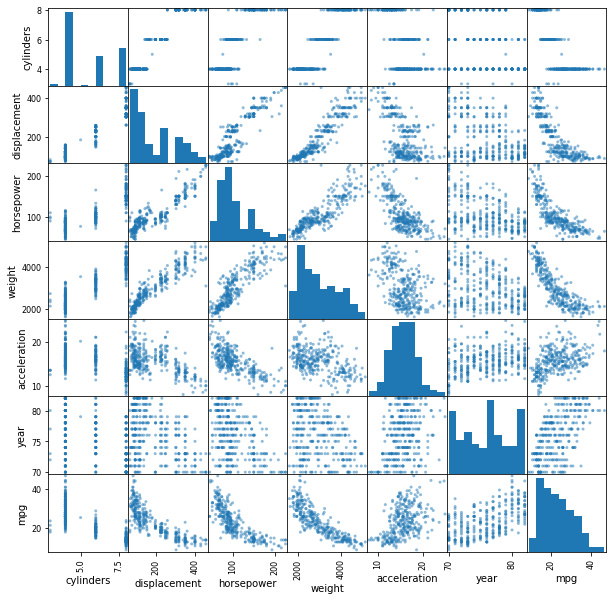

In [5]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(train[num_cols+['mpg']], figsize=(10,10))
plt.show()

### Quadratic model

#### Building pipeline

In [6]:
from sklearn.preprocessing import PolynomialFeatures

num_pipeline_poly2 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler())
])

#full pipeline - combine numeric and class pipelines
data_pipeline_poly2 = ColumnTransformer([
    ('numeric', num_pipeline_poly2, num_cols),
    ('class', cat_pipeline, cat_cols)
])

poly2_reg_pipeline = Pipeline([
    ('processing', data_pipeline_poly2),
    ('modeling', LinearRegression())
])

#### Model testing

In [7]:
r2_10cv = cross_val_score(poly2_reg_pipeline, train, train[[target]], cv=10, scoring='r2')
np.mean(r2_10cv)

0.860756124393966

### Cubic model

#### Processing pipeline

In [8]:
num_pipeline_poly3 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('standardize', StandardScaler())
])

#pipeline for class features
data_pipeline_poly3 = ColumnTransformer([
    ('numeric', num_pipeline_poly3, num_cols),
    ('class', cat_pipeline, cat_cols)
])

poly3_reg_pipeline = Pipeline([
    ('processing', data_pipeline_poly3),
    ('modeling', LinearRegression())
])

#### Model testing

In [9]:
r2_10cv = cross_val_score(poly3_reg_pipeline, train, train[[target]], cv=10, scoring='r2')
np.mean(r2_10cv)

0.5773308094289162

### Bi-quadratic model

#### Processing pipeline

In [10]:
num_pipeline_poly4 = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=4)),
    ('standardize', StandardScaler())
])

#full pipeline - combine numeric and class pipelines
data_pipeline_poly4 = ColumnTransformer([
    ('numeric', num_pipeline_poly4, num_cols),
    ('class', cat_pipeline, cat_cols)
])

poly4_reg_pipeline = Pipeline([
    ('processing', data_pipeline_poly4),
    ('modeling', LinearRegression())
])

#### Model testing

In [11]:
r2_10cv = cross_val_score(poly4_reg_pipeline, train, train[[target]], cv=10, scoring='r2')
np.mean(r2_10cv)

-125.40707047461794

So, training R2 is even higher than before, and cross-validation R2 is negative now, all of which suggests this model is overfitting the data even more severely. 

Let's try a regular linear model without polynomial features

### Result Recap

|Model    |Training CV R2|
|---------|--------------|
|Linear   |0.820         |
|Degree 2 |0.861         |
|Degree 3 |0.577         |
|Degree 4 |-125.4        |